In [1]:
# imports
import sys
sys.path.append('..')
import qanic as qa
import qutip as qt
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Encoding $H_z$, internal represenation, and basic methods
To use our package, one must first encode $H_z$ into a dictionary (support for other inputs can be added easily if desired, but it's not a priory of ours). Then, dictH can be passed to the primary class of our package, IsingH. 

In [2]:
dictH = {(0, 0): 0, (1, 1): 0, (2, 2): 0,
        (0, 1): 1, (0, 2): 1, (1, 2): 1}
H = qa.IsingH(dictH, "K3", hx_ver=0)
mH = qa.IsingH(dictH, "K3", hx_ver=1)

## Internal $H_z$ representation via QuTiP
Our package uses [QuTiP](http://qutip.org/ "QuTiP homepage") as our "quantum backend." That is, QuTiP gives us an ecosystem to define Hamiltonians and wavefunctions that we can evolve with various solvers. Upon creating H, dictH is automatically mapped to the QuTiP version of $H_{TFIM}$ is automatically created.

In [3]:
# up to the A(s) / 2 constant, Hx for 3 qubits is defined as...
I, X = qt.identity(2), qt.sigmax()
Hx = qt.tensor(X, I, I) + qt.tensor(I, X, I) + qt.tensor(I, I, X)
print("Result of Hx == H.num_Hx is {}.".format(Hx == H.num_Hx))

Z = qt.sigmaz()
# we can ignore qubit-magnetic field interaction terms since h_i = 0 for all i
Hz = dictH[(0, 1)]*qt.tensor(Z, Z, I) + dictH[(0, 2)]*qt.tensor(Z, I, Z) + dictH[(1, 2)]*qt.tensor(I, Z, Z)
print("Result of Hz == H.num_Hz is {}.".format(Hz == H.num_Hz))

print(H.num_Hz)

Result of Hx == H.num_Hx is True.
Result of Hz == H.num_Hz is True.
Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.]]


In [4]:
print("Result of Hx == H.num_Hx is {}.".format((-1)*Hx == mH.num_Hx))

Result of Hx == H.num_Hx is True.


## Simple Methods on H

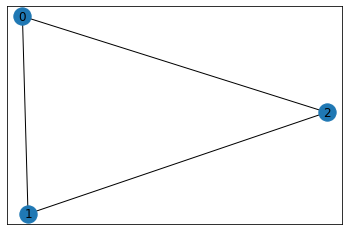

In [5]:
# this shows the connectively of the Hz graph
# NOTE: dist not to scale
H.visualize()

In [6]:
# we can diagonlize Hz using QuTiP
H.diag_Hz()

(array([-1., -1., -1., -1., -1., -1.,  3.,  3.]),
 array([Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]],
        Quantum object: dims = [

In [7]:
# however, QuTiP doesn't handle degenerate gs well, so
# we implemented our own function
gsinfo = H.Hz_gs_info(etol=1e-8, stol=1e-12)
print("GS state: {} with E: {}".format(gsinfo['gs'], gsinfo['E']))

GS state: [0.        +0.j 0.40824829+0.j 0.40824829+0.j 0.40824829+0.j
 0.40824829+0.j 0.40824829+0.j 0.40824829+0.j 0.        +0.j] with E: -1.0


In [8]:
m_gsinfo = mH.Hz_gs_info(etol=1e-8, stol=1e-12)
print("GS state: {} with E: {}".format(m_gsinfo['gs'], m_gsinfo['E']))

GS state: [0.        +0.j 0.40824829+0.j 0.40824829+0.j 0.40824829+0.j
 0.40824829+0.j 0.40824829+0.j 0.40824829+0.j 0.        +0.j] with E: -1.0


In [9]:
# similarly, we can get the gs of H_TFIM(s=0)
H.dwaveH0_gs()

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.35161384]
 [-0.35419755]
 [-0.35419755]
 [ 0.35419755]
 [-0.35419755]
 [ 0.35419755]
 [ 0.35419755]
 [-0.35161384]]

In [10]:
mH.dwaveH0_gs()

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[-0.35161384]
 [-0.35419755]
 [-0.35419755]
 [-0.35419755]
 [-0.35419755]
 [-0.35419755]
 [-0.35419755]
 [-0.35161384]]

We can recreate this ground-state in the expected way as an "equal superposition" among all the qubits

In [11]:
qt.tensor([X.groundstate()[1] for qubits in range(3)])

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[-0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [-0.35355339]
 [ 0.35355339]
 [-0.35355339]
 [-0.35355339]
 [ 0.35355339]]

In [12]:
qt.tensor([(-1*X).groundstate()[1] for qubits in range(3)])

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[-0.35355339]
 [-0.35355339]
 [-0.35355339]
 [-0.35355339]
 [-0.35355339]
 [-0.35355339]
 [-0.35355339]
 [-0.35355339]]

There is a minor difference, of course, since $H_{TFIM}$ always contains both terms. That is, at $s = 0$, $A(0) >> B(0)$, but $B(0)$ is still not 0.

In [13]:
# or H_TFIM(s=1)
H.dwaveH1_gs()

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[-8.60700868e-08]
 [ 4.08248291e-01]
 [ 4.08248290e-01]
 [-4.08248290e-01]
 [ 4.08248290e-01]
 [-4.08248291e-01]
 [-4.08248290e-01]
 [ 8.60700868e-08]]

In [14]:
mH.dwaveH1_gs()

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[8.60700868e-08]
 [4.08248291e-01]
 [4.08248290e-01]
 [4.08248290e-01]
 [4.08248290e-01]
 [4.08248291e-01]
 [4.08248290e-01]
 [8.60700868e-08]]

Notice that this is almost the same as the result of Hz_gs_info which performed direct diagonlizaiton. The minor error arises for the same reason as before: $A(s)$ and $B(s)$ are never actually 0.

# Numerical Annealing to obtain ground-state of $H_z$

There are two important numerical annealing methods on H: numeric_anneal and frem_anneal. In both cases, the the internals handle discretizing the input schedules, using this schedule to interpolate A(s(t)) and B(s(t)), and the, of course, solving $H_{TFIM}$ for the discretized times. The output is the final probability amplitudes of each state obtained from this process where the initial state is either a known ground-state or a user-supplied input state.

## Numeric Forward Anneal

In [15]:
# direct diag results for comparison
gsprobs = (gsinfo['gs']*gsinfo['gs'].conj()).real
m_gsprobs = (m_gsinfo['gs']*m_gsinfo['gs'].conj()).real

In [16]:
gsprobs

array([0.        , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.        ])

In [17]:
m_gsprobs

array([0.        , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.        ])

In [18]:
# let's define a simple forward anneal schedule and see how the results scale with T
def fsch(T):
    return [[0, 0], [T, 1]]

# let's perform anneals of different lengths and compare the results to direct diagonlization
quick = H.numeric_anneal(fsch(0.1))
medium = H.numeric_anneal(fsch(1))
slow = H.numeric_anneal(fsch(10))
results = [quick, medium, slow]

In [19]:
# let's perform anneals of different lengths and compare the results to direct diagonlization
m_quick = mH.numeric_anneal(fsch(0.1))
m_medium = mH.numeric_anneal(fsch(1))
m_slow = mH.numeric_anneal(fsch(10))
m_results = [m_quick, m_medium, m_slow]

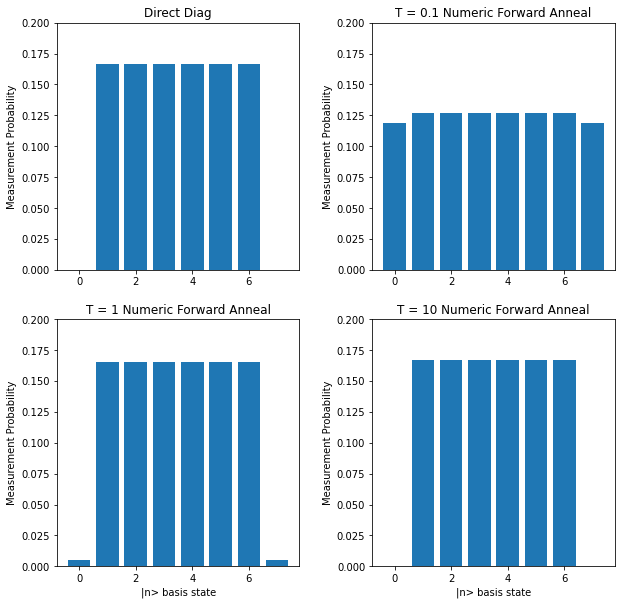

In [20]:
fig = plt.figure(figsize = (10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.3)
ylim = [0, 0.2]

fig.add_subplot(2, 2, 1)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], gsprobs.flatten())
plt.ylabel('Measurement Probability')
plt.title('Direct Diag')
plt.ylim(ylim)

fig.add_subplot(2, 2, 2)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], quick.flatten())
plt.ylabel('Measurement Probability')
plt.title('T = 0.1 Numeric Forward Anneal')
plt.ylim(ylim)

fig.add_subplot(2, 2, 3)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], medium.flatten())
plt.ylabel('Measurement Probability')
plt.xlabel('|n> basis state')
plt.title('T = 1 Numeric Forward Anneal')
plt.ylim(ylim)

fig.add_subplot(2, 2, 4)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], slow.flatten())
plt.ylabel('Measurement Probability')
plt.xlabel('|n> basis state')
plt.title('T = 10 Numeric Forward Anneal')
plt.ylim(ylim)
plt.show()

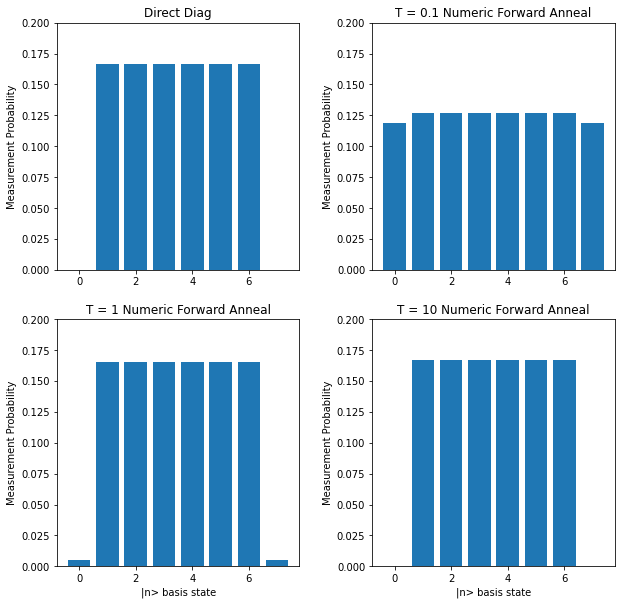

In [21]:
fig = plt.figure(figsize = (10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.3)
ylim = [0, 0.2]

fig.add_subplot(2, 2, 1)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], m_gsprobs.flatten())
plt.ylabel('Measurement Probability')
plt.title('Direct Diag')
plt.ylim(ylim)

fig.add_subplot(2, 2, 2)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], m_quick.flatten())
plt.ylabel('Measurement Probability')
plt.title('T = 0.1 Numeric Forward Anneal')
plt.ylim(ylim)

fig.add_subplot(2, 2, 3)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], m_medium.flatten())
plt.ylabel('Measurement Probability')
plt.xlabel('|n> basis state')
plt.title('T = 1 Numeric Forward Anneal')
plt.ylim(ylim)

fig.add_subplot(2, 2, 4)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], m_slow.flatten())
plt.ylabel('Measurement Probability')
plt.xlabel('|n> basis state')
plt.title('T = 10 Numeric Forward Anneal')
plt.ylim(ylim)
plt.show()

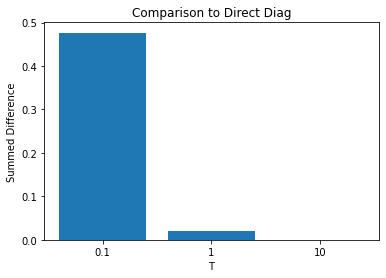

In [22]:
# Perhaps easier to see if a "total different" plot
diffs = [sum(abs(gsprobs - result)) for result in results]
plt.bar(["0.1", "1", "10"], diffs)
plt.ylabel('Summed Difference')
plt.xlabel('T')
plt.title('Comparison to Direct Diag')
plt.show()

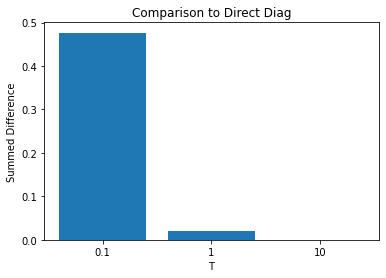

In [23]:
# Perhaps easier to see if a "total different" plot
m_diffs = [sum(abs(gsprobs - result)) for result in m_results]
plt.bar(["0.1", "1", "10"], m_diffs)
plt.ylabel('Summed Difference')
plt.xlabel('T')
plt.title('Comparison to Direct Diag')
plt.show()